## Chapter 2 - Time Series Graphics

This notebook contains solutions to the exercises in chapter 2 in [Forecasting: Principles and Practice](https://otexts.com/fpp2/).

### Setup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf

DATA_PATH = '../data/'

# Plot settings
sns.set_context('notebook') 
sns.set_style('darkgrid')
%matplotlib inline

### Question 1

### Question 2
Download the file tute1.csv from the book website, open it in Excel (or some other spreadsheet application), and review its contents. 

You should find four columns of information. Columns B through D each contain a quarterly series, labelled Sales, AdBudget and GDP. Sales contains the quarterly sales for a small company over the period 1981-2005. AdBudget is the advertising budget and GDP is the gross domestic product. All series have been adjusted for inflation.

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%b-%y')
tute1 = pd.read_csv(DATA_PATH+'tute1.csv', parse_dates=["Unnamed: 0"], date_parser=dateparse)
tute1.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
tute1.set_index('Date', inplace=True)

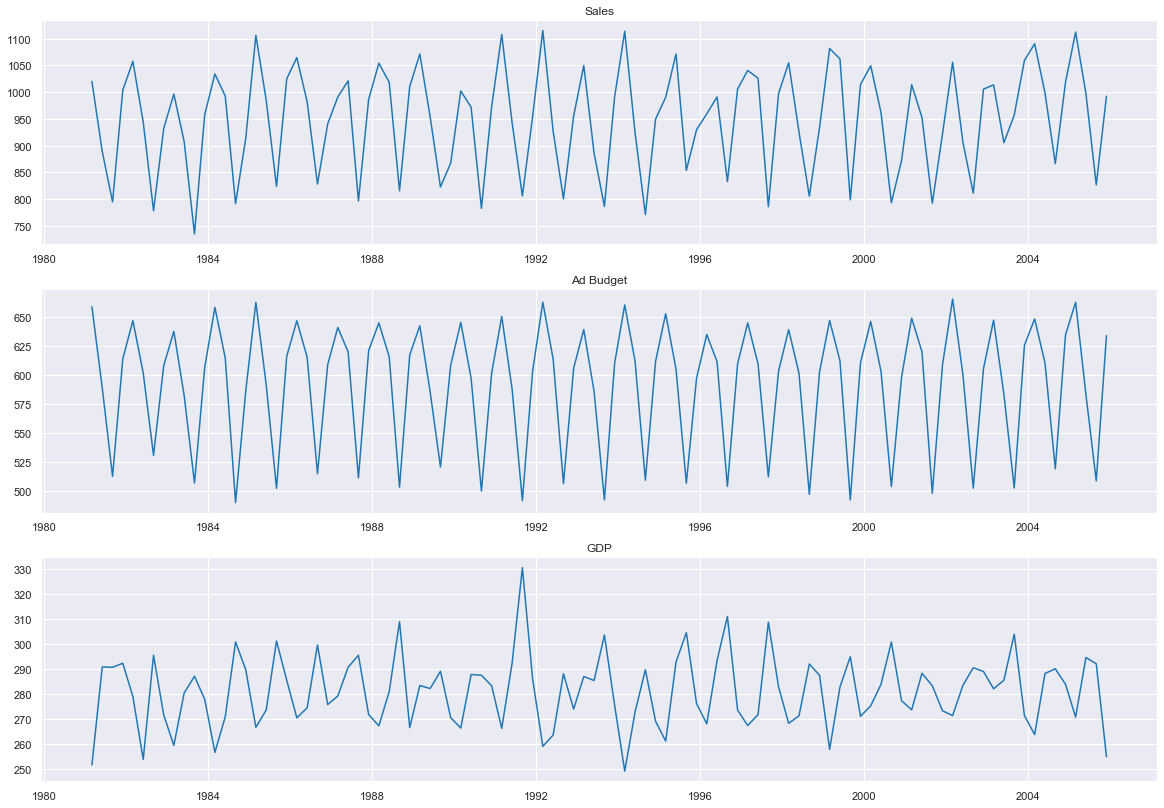

In [3]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(311)
ax.set_title("Sales")
ax.plot(tute1["Sales"])
ax.grid(True)

ax = fig.add_subplot(312)
ax.set_title("Ad Budget")
ax.plot(tute1["AdBudget"])
ax.grid(True)

ax = fig.add_subplot(313)
ax.set_title("GDP")
ax.plot(tute1["GDP"])
ax.grid(True)

### Question 3

Download some monthly Australian retail data from the book website. These represent retail sales in various categories for different Australian states, and are stored in a MS-Excel file.

Select one of the retail time series and explore it using the following functions: autoplot(), ggseasonplot(), ggsubseriesplot(), gglagplot(), ggAcf()

Can you spot any seasonality, cyclicity and trend? What do you learn about the series?

In [4]:
retail = pd.read_excel(DATA_PATH+'retail.xlsx', header=1, parse_dates=['Series ID'], index_col = 'Series ID')
np.random.seed(2013)
cols = np.random.choice(retail.columns.to_list(), 4)

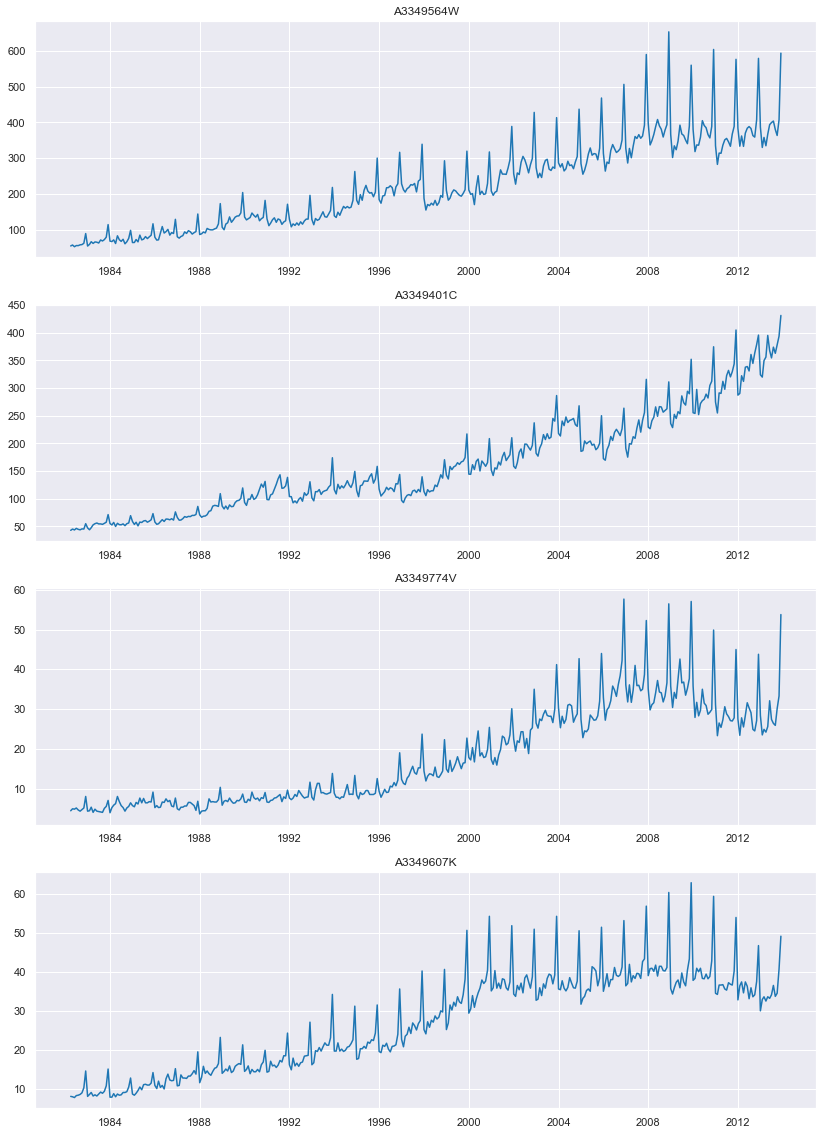

In [5]:
fig = plt.figure(figsize=(14, 20))

ax = fig.add_subplot(411)
ax.set_title(cols[0])
ax.plot(retail[cols[0]])
ax.grid(True)

ax = fig.add_subplot(412)
ax.set_title(cols[1])
ax.plot(retail[cols[1]])
ax.grid(True)

ax = fig.add_subplot(413)
ax.set_title(cols[2])
ax.plot(retail[cols[2]])
ax.grid(True)

ax = fig.add_subplot(414)
ax.set_title(cols[3])
ax.plot(retail[cols[3]])
ax.grid(True)

Clearly this is retail data so we can see an upward trend over time in most cases along with a lot of seasonality within years corresponding to spikes in shopping period.

### Question 4

### Question 5

### Question 6

### Question 7

### Question 8

The following time plots and ACF plots correspond to four different time series. Your task is to match each time plot in the first row with one of the ACF plots in the second row.

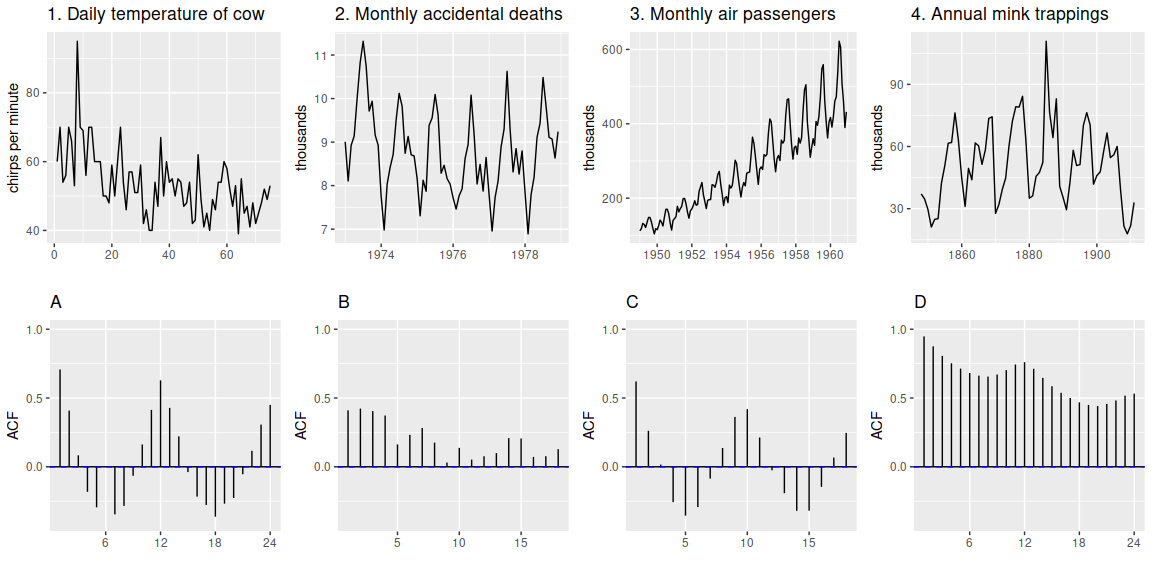

In [6]:
Image(filename=DATA_PATH+'acfguess-1.png')

1. B - Slight trend in time series plot reflected in ACF plot
2. A - Clear six month seasonality in the data, can see corresponding spikes in ACF plot every 12 lags
3. D - Very clear trend and seasonality reflected in the ACF plot
4. C - More cyclicality than seasonality in data, really chose it by process of elimination

### Question 9

### Question 10

DJI contains 292 consecutive trading days of the Dow Jones Index. Use ddj <- diff(dj) to compute the daily changes in the index. Plot ddj and its ACF. Do the changes in the Dow Jones Index look like white noise?

In [7]:
dji = pd.read_csv(DATA_PATH+'DJI.csv', parse_dates=["Date"], index_col="Date")
dji["returns"] = dji[["Close"]].pct_change()

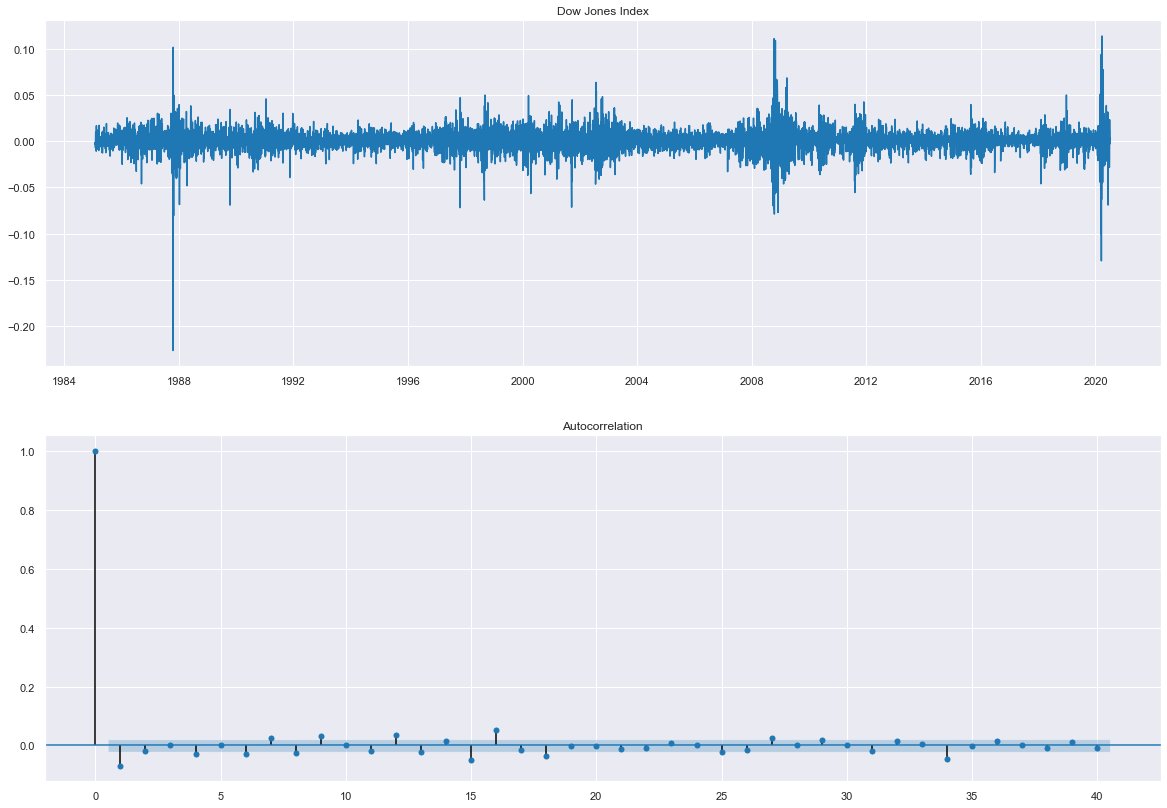

In [8]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(211)
ax.set_title("Dow Jones Index")
ax.plot(dji["returns"])
ax.grid(True)

ax = fig.add_subplot(212)
plot_acf(dji["returns"].dropna(), lags=40, ax=ax)
ax.grid(True)

Very low autocorrelation suggests that it looks like white noise, but we know that returns are not stationary so it's not actually white noise.